In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Support Vector Machines**

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/day6_dataset/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.drop(['Id'], axis =1)
target = df['Species']
s = set()
for val in target:
  s.add(val)

s = list(s)
print(s)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [6]:
rows = list(range(100,150))
df = df.drop(df.index[rows])

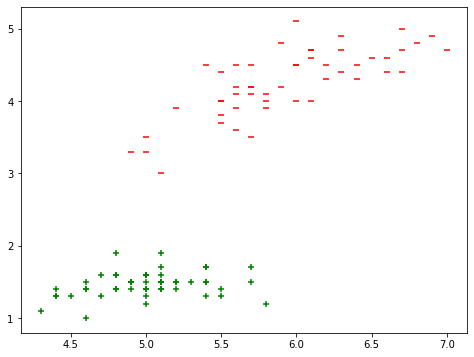

In [7]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x, setosa_y, marker='+', color='green')
plt.scatter(versicolor_x, versicolor_y, marker='_', color='red')
plt.show()

In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

df = df.drop(['SepalWidthCm', 'PetalWidthCm'], axis =1)
Y = []
target = df['Species']

for val in target:
  if (val == 'Iris-setosa'):
    Y.append(-1)
  else:
    Y.append(1)

df = df.drop(['Species'], axis =1)
X = df.values.tolist()

X,Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [11]:
# Python implementation of svm (manual)

train_f1 = x_train[:, 0]
train_f2 = x_train[:, 1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs =1
alpha = 0.0001

while epochs < 10000 :
  y = w1*train_f1 + w2*train_f2
  prod = y*y_train
  count =0
  for val in prod:
    if val >=1:
      cost =0
      w1 = w1 - alpha*(2*1/epochs*w1)
      w2 = w2 - alpha*(2*1/epochs*w2)

    else:
      cost = 1- val
      w1 = w1 + alpha*(train_f1[count]*y_train[count]- 2*1/epochs*w1)
      w2 = w2 + alpha*(train_f2[count]*y_train[count]- 2*1/epochs*w2)

    count+=1
  epochs+=1

In [12]:
from sklearn.metrics import accuracy_score

index = list(range(10, 90))
w1 = np.delete(w1, index)
w2 = np.delete(w2, index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

test_f1 = x_test[:, 0]
test_f2 = x_test[:, 1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

y_pred = w1*test_f1 + w2*test_f2
predictions =[]
for val in y_pred:
  if val> 1:
    predictions.append(1)
  else:
    predictions.append(-1)

print(accuracy_score(y_test, predictions))

0.9


In [13]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))



1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Naive bayes - gaussian**

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state =1 )

from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(X_train, y_train)

y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

95.0


In [15]:
y_train.shape

(90,)

**K Means Clustering**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
x = df.iloc[:, [0,1,2,3]].values

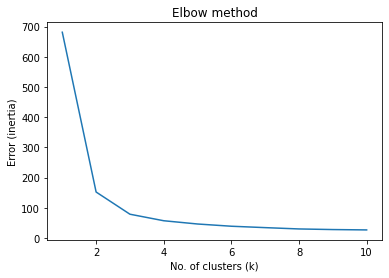

In [20]:
Error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  Error.append(kmeans.inertia_)

plt.plot(range(1,11), Error)
plt.title('Elbow method')
plt.xlabel('No. of clusters (k)')
plt.ylabel('Error (inertia)')
plt.show()

In [22]:
# implement for k =3
kmeans_3 = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10, random_state =0)
ymeans = kmeans_3.fit_predict(x)

print(ymeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [23]:
print(kmeans_3.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


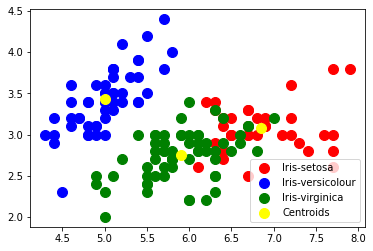

In [24]:
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [25]:
sample_test = np.array([5.1, 3.5, 1.4, 0.2])
sample_test = sample_test.reshape(1,-1)

kmeans_3.predict(sample_test)

array([1], dtype=int32)